In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

np.random.seed(42)

In [2]:
iris_data = load_iris() 
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

#print(y)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

/home/havish/.local/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [3]:
def relu(x):
    x[x<0]=0
    return x
def softmax(arr):
#     arr = arr/np.max(arr)
    return np.exp(arr)/(np.sum(np.exp(arr),axis=0))
def diff_relu(arr):
    z = np.zeros(arr.shape)
    z[arr<=0] = 0
    z[arr>0] = 1
    return z

In [4]:
def initializer(fan_out,fan_in):
    limit = np.sqrt(2*1.0/(fan_in+fan_out))
#     return np.random.uniform(-limit,limit,(fan_out,fan_in))
    return np.random.normal(0,limit,(fan_out,fan_in))

In [5]:
### architecture ###
in_dim = 4
hid1_dim = 10
hid2_dim = 10
out_dim = 3
W1 = initializer(hid1_dim,in_dim)
b1 = initializer(hid1_dim,1)
W2 = initializer(hid2_dim,hid1_dim)
b2 = initializer(hid2_dim,1)
W3 = initializer(out_dim,hid2_dim)
b3 = initializer(out_dim,1)

In [6]:
epochs = 500
num_samples = len(train_x)
batch_size = 10
num_batches = num_samples/batch_size
alpha = 0.7
eps = 1e-3
loss1 = []
v = {"W1" : np.zeros(W1.shape) , "W2" : np.zeros(W2.shape) ,"W3" : np.zeros(W3.shape),"b1": np.zeros(b1.shape)
     ,"b2" :np.zeros(b2.shape) , "b3" : np.zeros(b3.shape)}
for i in range(epochs):
    (x_train_subs,y_train_subs) = shuffle(train_x,train_y,random_state = 40)
    loss = 0
    for j in range(int(num_batches)):
        W1_upd = np.zeros((hid1_dim,in_dim))
        b1_upd = np.zeros((hid1_dim,1))
        W2_upd = np.zeros((hid2_dim,hid1_dim))
        b2_upd = np.zeros((hid2_dim,1))
        W3_upd = np.zeros((out_dim,hid2_dim))
        b3_upd = np.zeros((out_dim,1))
        
        W1 = W1 + alpha*v["W1"]
        b1 = b1 + alpha*v["b1"]
        W2 = W2 + alpha*v["W2"]
        b2 = b2 + alpha*v["b2"]
        W3 = W3 + alpha*v["W3"]
        b3 = b3 + alpha*v["b3"]
        for k in range(batch_size):
            z1 = relu(np.matmul(W1,x_train_subs[j*batch_size+k]).reshape(-1,1)+b1)
        
            z2 = relu(np.matmul(W2,z1).reshape(-1,1)+b2)

            out = softmax(np.matmul(W3,z2).reshape(-1,1) + b3)
        
            loss = loss + -np.log(out[np.argmax(y_train_subs[j*batch_size+k])])
        
            del_3 = out - y_train_subs[j*batch_size+k].reshape(-1,1)
            del_2 = np.matmul(W3.T,del_3)*diff_relu(z2)
            del_1 = np.matmul(W2.T,del_2)*diff_relu(z1)

            b3_upd += del_3
#         b3_upd = b3_upd.reshape(len(b3),1)
            b2_upd += del_2
#         b2_upd = b2_upd.reshape(len(b2),1)
            b1_upd += del_1
#         b1_upd = b1_upd.reshape(len(b1),1)
            W3_upd += np.matmul(del_3,z2.T)
            W2_upd += np.matmul(del_2,z1.T)
            W1_upd += np.matmul(del_1,x_train_subs[j*batch_size+k].reshape(-1,1).T)
        
        v["W1"] = alpha*v["W1"] - eps*(W1_upd)
        v["W2"] = alpha*v["W2"] - eps*(W2_upd)
        v["W3"] = alpha*v["W3"] - eps*(W3_upd)
        v["b1"] = alpha*v["b1"] - eps*(b1_upd)
        v["b2"] = alpha*v["b2"] - eps*(b2_upd)
        v["b3"] = alpha*v["b3"] - eps*(b3_upd)
        W3 = W3 + v["W3"]
        W2 = W2 + v["W2"]
        W1 = W1 + v["W1"]
        b3 = b3 + v["b3"]
        b2 = b2 + v["b2"]
        b1 = b1 + v["b1"]
    loss1.append(loss)
    print("Epoch: " + str(i) + " Loss: " + str(loss))

Epoch: 0 Loss: [149.31813844]
Epoch: 1 Loss: [79.4953995]
Epoch: 2 Loss: [55.03386392]
Epoch: 3 Loss: [43.29602324]
Epoch: 4 Loss: [35.89935253]
Epoch: 5 Loss: [30.42329365]
Epoch: 6 Loss: [26.61212873]
Epoch: 7 Loss: [23.61624474]
Epoch: 8 Loss: [20.92817856]
Epoch: 9 Loss: [18.89686713]
Epoch: 10 Loss: [17.4601471]
Epoch: 11 Loss: [16.7060665]
Epoch: 12 Loss: [16.65663074]
Epoch: 13 Loss: [17.01932292]
Epoch: 14 Loss: [17.3201812]
Epoch: 15 Loss: [17.34886525]
Epoch: 16 Loss: [17.19175278]
Epoch: 17 Loss: [17.03936046]
Epoch: 18 Loss: [16.95252009]
Epoch: 19 Loss: [16.55621493]
Epoch: 20 Loss: [16.37318168]
Epoch: 21 Loss: [16.53026483]
Epoch: 22 Loss: [16.5047715]
Epoch: 23 Loss: [16.72376626]
Epoch: 24 Loss: [16.93312372]
Epoch: 25 Loss: [17.09006778]
Epoch: 26 Loss: [17.37781817]
Epoch: 27 Loss: [18.54040227]
Epoch: 28 Loss: [20.85927694]
Epoch: 29 Loss: [21.36685891]
Epoch: 30 Loss: [23.88629469]
Epoch: 31 Loss: [22.37920357]
Epoch: 32 Loss: [21.76182661]
Epoch: 33 Loss: [19.2639

Epoch: 285 Loss: [11.21816087]
Epoch: 286 Loss: [11.10487591]
Epoch: 287 Loss: [11.11395062]
Epoch: 288 Loss: [11.09403861]
Epoch: 289 Loss: [11.14808922]
Epoch: 290 Loss: [11.10149562]
Epoch: 291 Loss: [11.22659163]
Epoch: 292 Loss: [11.19375081]
Epoch: 293 Loss: [11.12269632]
Epoch: 294 Loss: [11.10149651]
Epoch: 295 Loss: [11.06539252]
Epoch: 296 Loss: [11.0562233]
Epoch: 297 Loss: [11.08777657]
Epoch: 298 Loss: [11.07057431]
Epoch: 299 Loss: [10.93287441]
Epoch: 300 Loss: [10.96319339]
Epoch: 301 Loss: [10.915873]
Epoch: 302 Loss: [10.87614023]
Epoch: 303 Loss: [11.17192037]
Epoch: 304 Loss: [10.87700395]
Epoch: 305 Loss: [10.94379746]
Epoch: 306 Loss: [10.95258102]
Epoch: 307 Loss: [10.89885206]
Epoch: 308 Loss: [10.90864153]
Epoch: 309 Loss: [10.87294622]
Epoch: 310 Loss: [11.01971073]
Epoch: 311 Loss: [11.04573319]
Epoch: 312 Loss: [10.80863962]
Epoch: 313 Loss: [11.01957094]
Epoch: 314 Loss: [11.00475648]
Epoch: 315 Loss: [10.72580641]
Epoch: 316 Loss: [10.84775573]
Epoch: 317 

In [7]:
z1 = relu(np.matmul(W1,test_x[4]).reshape(-1,1)+b1)
z2 = relu(np.matmul(W2,z1).reshape(-1,1)+b2)
out = softmax(np.matmul(W3,z2).reshape(-1,1) + b3)

In [8]:
print(out)

[[1.03508093e-06]
 [9.99051692e-01]
 [9.47273274e-04]]


In [9]:
print(test_y[4])

[0. 1. 0.]


In [10]:
preds = []
true = []
# print(np.argmax(out))
for i in range(len(test_x)):
    z1 = relu(np.matmul(W1,test_x[i]).reshape(-1,1)+b1)
    z2 = relu(np.matmul(W2,z1).reshape(-1,1)+b2)
    out = softmax(np.matmul(W3,z2).reshape(-1,1) + b3)
    preds.append(np.argmax(out))
    true.append(np.argmax(test_y[i]))

In [11]:
print(preds)

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0]


In [12]:
print(true)

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]


In [13]:
acc =accuracy_score(y_pred=preds,y_true=true)
print(acc)

0.9666666666666667


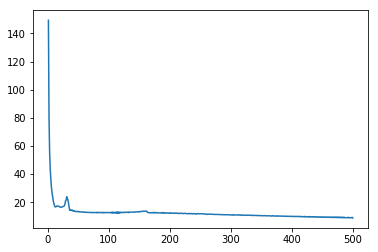

In [14]:
epochs = np.arange(1,501)
plt.plot(epochs,loss1)
plt.show()

In [15]:
for elem in np.array(loss1):
    print(str(elem[0])+',' , end = '')

149.31813844347164,79.4953994978193,55.033863921742864,43.296023241566616,35.89935253087307,30.42329365025284,26.612128727078744,23.616244742838564,20.928178562337305,18.89686713418274,17.460147095599517,16.70606649557535,16.65663074211073,17.019322920423978,17.320181200007248,17.34886524943121,17.191752775923142,17.03936046062264,16.952520089882654,16.55621493062584,16.373181682547468,16.53026483240457,16.504771496971628,16.723766255395724,16.933123717582355,17.090067783649467,17.377818168399678,18.540402267938827,20.859276936172044,21.366858914737932,23.886294690291546,22.379203569958722,21.76182660741379,19.2639511155233,16.276517525891485,14.256883898264046,14.707717850758375,14.21281966572102,14.11084708960717,14.536706505240781,13.79234873455856,13.706892686902266,13.944140451557761,13.445973218186742,13.519718008268324,13.442127433791788,13.296096476219752,13.331451546041617,13.525041349909788,13.187490633511404,13.29258329610067,13.137153268628659,13.228427608947257,13.12174510